In [1]:
import monkeybread as mb
import scanpy as sc
import pandas as pd
import subprocess
import matplotlib.pyplot as plt
import matplotlib as mpl
import itertools
import seaborn as sns
import os
import sys
import numpy as np
import pandas as pd
import scanpy as sc
import anndata as ad
import squidpy as sq
import random
from adjustText import adjust_text

sc.settings.verbosity = 3

/opt/homebrew/Caskroom/miniconda/base/envs/monkeybread_env/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
# load your adata object
adata = ad.read_h5ad("/PATH/spatial_obj.h5ad")

In [7]:
# check keys in adata object
rint(adata.obsm.keys())
adata.obsm['X_spatial'] = adata.obsm['spatial']
print(adata.obsm.keys())

KeysView(AxisArrays with keys: X_pca, X_umap, spatial)
KeysView(AxisArrays with keys: X_pca, X_umap, spatial, X_spatial)


/opt/homebrew/Caskroom/miniconda/base/envs/monkeybread_env/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


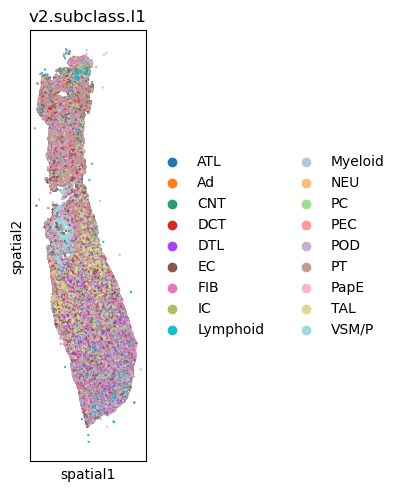

In [9]:
# plot spatial scatterplot

sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=[
        "v2.subclass.l1", # this is where my cell types are stored, use your cell type column name
    ],
    wspace=0.4,
)

/opt/homebrew/Caskroom/miniconda/base/envs/monkeybread_env/lib/python3.12/site-packages/squidpy/pl/_spatial_utils.py:981: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  _cax = scatter(


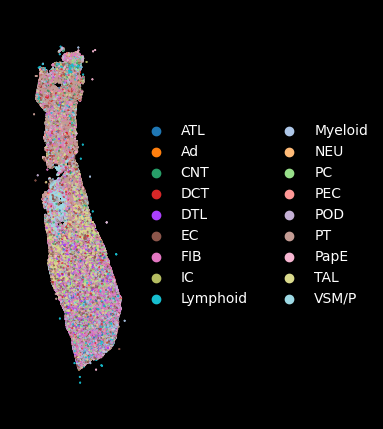

In [10]:
# spatial scatterplot in black

fig, ax = plt.subplots() 

sq.pl.spatial_scatter(
    adata,
    library_id="spatial",
    shape=None,
    color=["v2.subclass.l1"],
    wspace=0.4,
    ax=ax  
)

ax.set_facecolor('black')
fig.patch.set_facecolor('black')

legend = ax.get_legend()
if legend:  
    plt.setp(legend.get_texts(), color='white')

plt.show()

In [11]:
# can subset adata object to show specific cell types of interest

subclass_l2_values = ['POD', 'EC-GC', 'PT-S1', 'DCT', 'MD', 'MC', 'FIB', 'C-TAL', 'B']

# subset object based on the subclass.l1 values
adata_sub = adata[adata.obs['v2.subclass.l2'].isin(subclass_l2_values)].copy()

print(adata_sub.shape)
print(adata_sub.obs['v2.subclass.l2'].unique())

print(adata_sub.obsm.keys())
adata_sub.obsm['X_spatial'] = adata_sub.obsm['spatial']
print(adata_sub.obsm.keys())

(31666, 300)
['DCT', 'PT-S1', 'MD', 'B', 'C-TAL', 'FIB', 'EC-GC', 'POD', 'MC']
Categories (9, object): ['B', 'C-TAL', 'DCT', 'EC-GC', ..., 'MC', 'MD', 'POD', 'PT-S1']
KeysView(AxisArrays with keys: X_pca, X_umap, spatial, X_spatial)
KeysView(AxisArrays with keys: X_pca, X_umap, spatial, X_spatial)


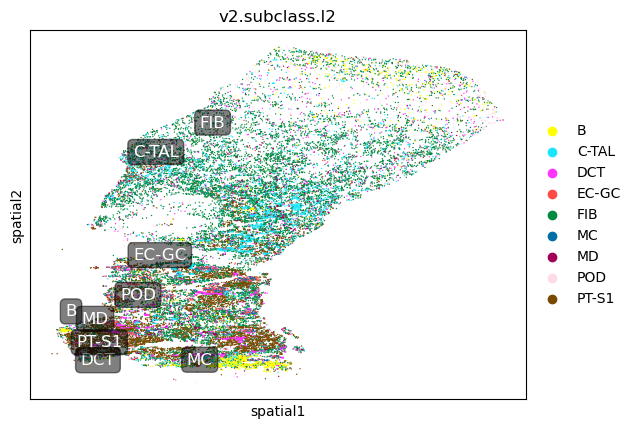

In [13]:
# show specific cell types in scatterplot

sc.pl.embedding(
    adata_sub, 
    "spatial", 
    color='v2.subclass.l2', 
    palette=sc.pl.palettes.godsnot_102, 
    show=False
)


texts = []
for cell_type in adata_sub.obs['v2.subclass.l2'].unique():
    cell_type_mask = adata_sub.obs['v2.subclass.l2'] == cell_type
    x_pos = adata_sub.obsm['spatial'][cell_type_mask, 0][0]
    y_pos = adata_sub.obsm['spatial'][cell_type_mask, 1][0]

    text = plt.text(
        x_pos, y_pos, cell_type, 
        fontsize=12, color='white',
        bbox=dict(facecolor='black', alpha=0.5, boxstyle='round,pad=0.3')
    )
    texts.append(text)


adjust_text(texts, arrowprops=dict(arrowstyle='->', color='white'))

plt.show()

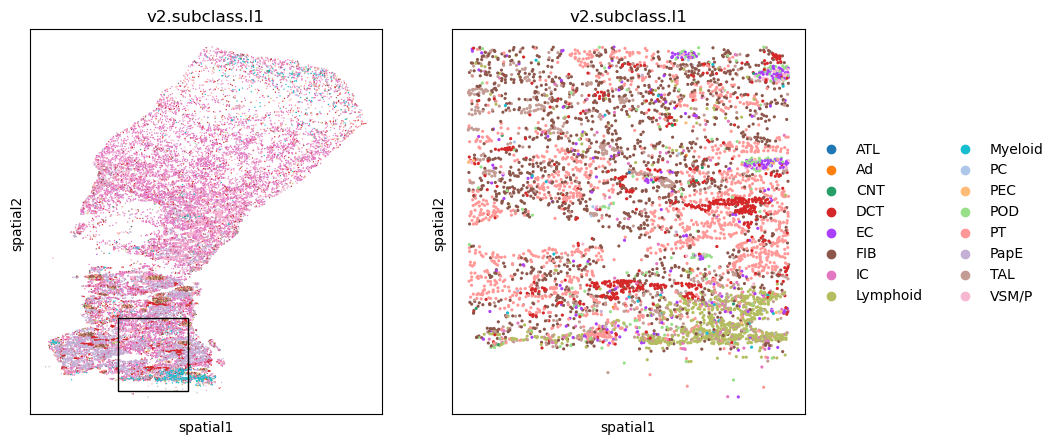

In [14]:
# zoom in on a specific area of interest

# coordinates of bounding box of zoomed-in region (play with coordinates to focus on desired location)
LEFT_PCT = 25
TOP_PCT = 75
WIDTH_PCT = 20
HEIGHT_PCT = 19
fig, axarr = plt.subplots(1,2,figsize=(10,5))
adata_zoom = mb.plot.embedding_zoom(
    adata_sub, 
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT, 
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='v2.subclass.l1', 
    mask=None, 
    basis='spatial', 
    palette=sc.pl.palettes.vega_20_scanpy,
    show=True,
    axs=axarr
);

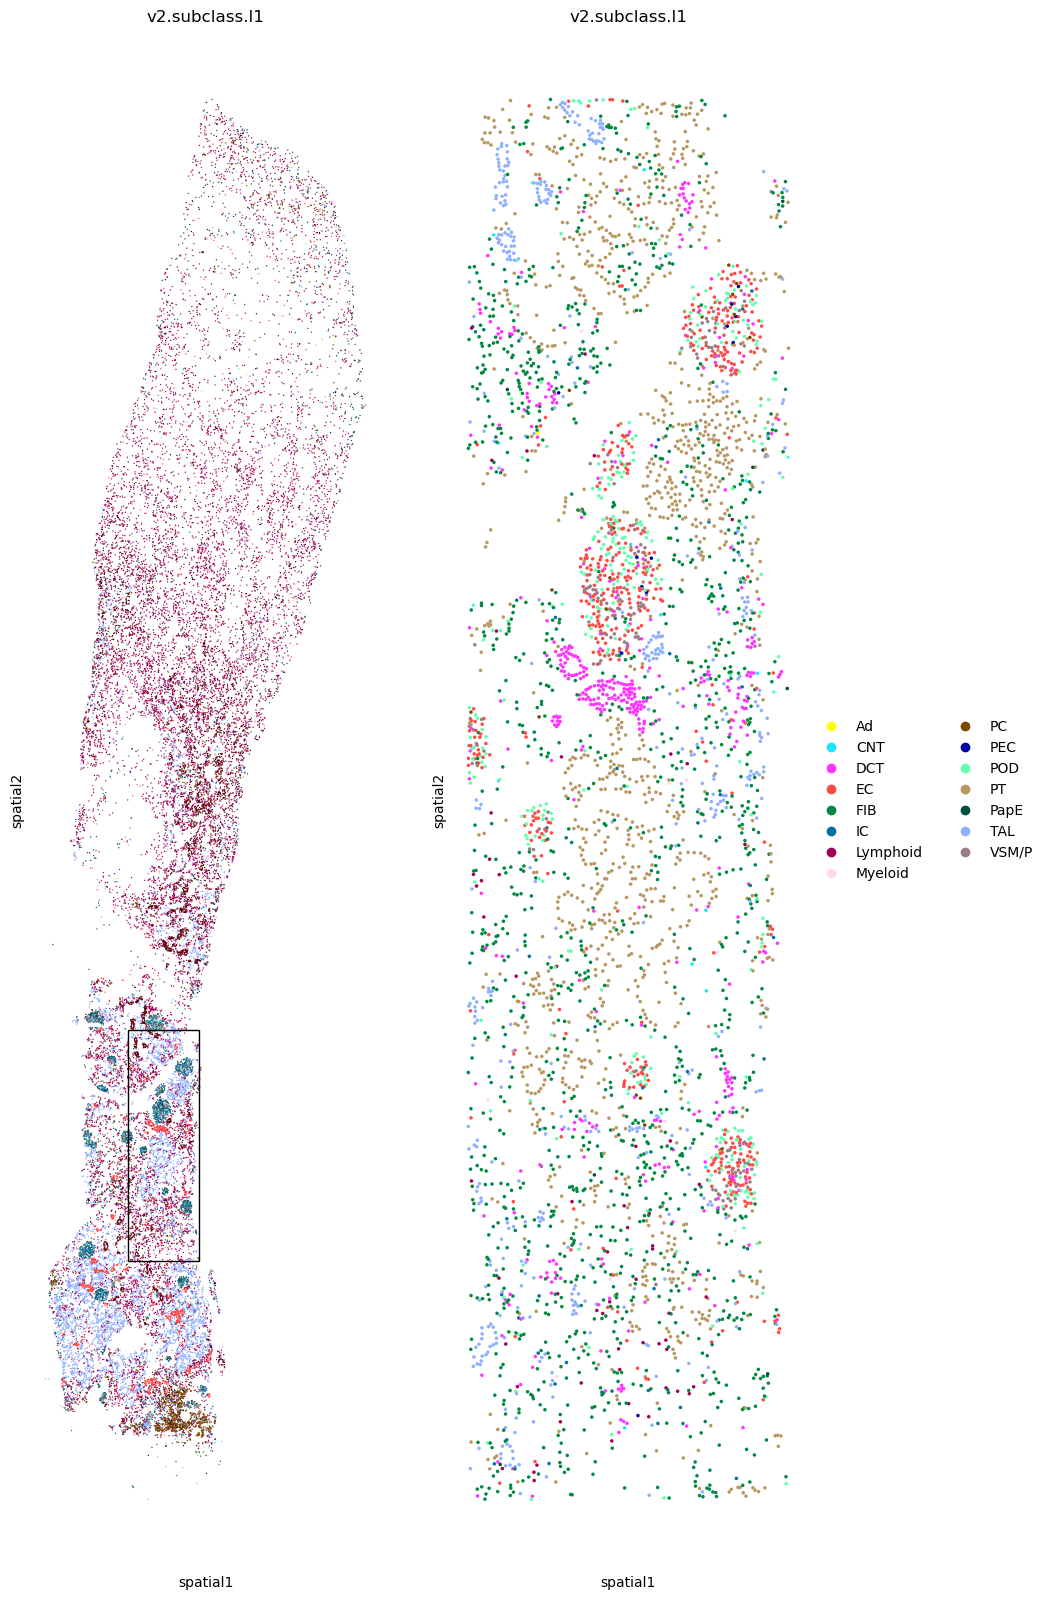

In [40]:
LEFT_PCT = 28
TOP_PCT = 65
WIDTH_PCT = 20
HEIGHT_PCT = 15


fig, axarr = plt.subplots(1, 2, figsize=(10, 20))  

adata_zoom = mb.plot.embedding_zoom(
    adata_sub,
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='v2.subclass.l1',
    mask=None,
    basis='spatial',
    palette=sc.pl.palettes.godsnot_102,
    show=False,
    axs=axarr
)


for ax in axarr:
    #ax.set_aspect('equal', 'box')
    #ax.set_facecolor('black')

   
    ax.grid(False)  
    ax.spines['top'].set_color('none')  # hide top spine
    ax.spines['right'].set_color('none')  # hide right spine
    ax.spines['left'].set_color('none')  # hide left spine
    ax.spines['bottom'].set_color('none')  # hide bottom spine

# display the plot
plt.show()

/opt/homebrew/Caskroom/miniconda/base/envs/monkeybread_env/lib/python3.12/site-packages/scanpy/plotting/_utils.py:471: ImplicitModificationWarning: Trying to modify attribute `._uns` of view, initializing view as actual.
  adata.uns[value_to_plot + "_colors"] = colors_list


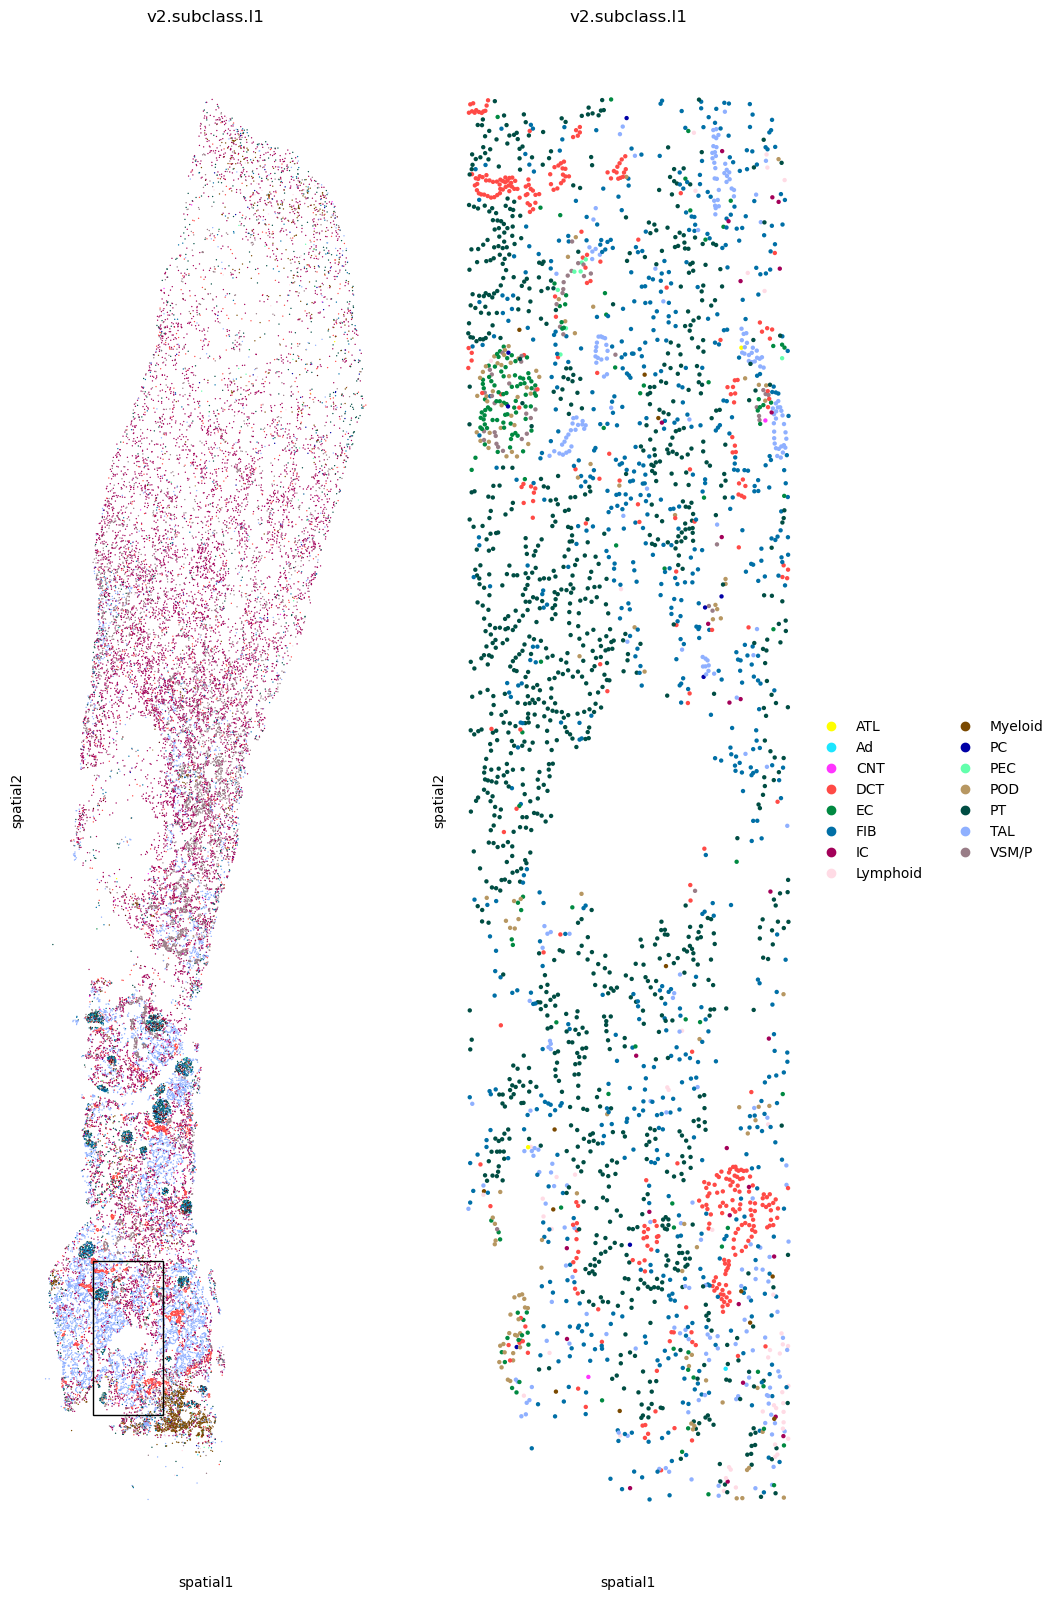

In [41]:
# focus on specific cell types and exclude certain cell types

# define the cell type to exclude (if any)
excluded_cell_type = 'PapE'  

# create a mask to exclude the specific cell type
mask = adata_sub.obs['v2.subclass.l1'] != excluded_cell_type

# define zoom region percentages
LEFT_PCT = 18
TOP_PCT = 80
WIDTH_PCT = 20
HEIGHT_PCT = 10

# create the plot
fig, axarr = plt.subplots(1, 2, figsize=(10, 20))  

adata_zoom = mb.plot.embedding_zoom(
    adata_sub[mask],  # Apply the mask here
    left_pct=LEFT_PCT,
    top_pct=TOP_PCT,
    width_pct=WIDTH_PCT,
    height_pct=HEIGHT_PCT,
    color='v2.subclass.l1',
    mask=None,  # Use None since filtering is already applied
    basis='spatial',
    palette=sc.pl.palettes.godsnot_102,
    show=False,
    axs=axarr
)


#for ax in axarr:
   # ax.set_aspect('equal', 'box')
   # ax.set_facecolor('black')
    
for ax in axarr:
    ax.grid(False)  
    ax.spines['top'].set_color('none')  # hide top spine
    ax.spines['right'].set_color('none')  # hide right spine
    ax.spines['left'].set_color('none')  # hide left spine
    ax.spines['bottom'].set_color('none')  # hide bottom spine

# Display the plot
plt.show()


/opt/homebrew/Caskroom/miniconda/base/envs/monkeybread_env/lib/python3.12/site-packages/monkeybread/calc/_cell_density.py:117: RuntimeWarning: overflow encountered in exp
  kernel = 1 / np.exp(np.square(bin_distances / bandwidth))


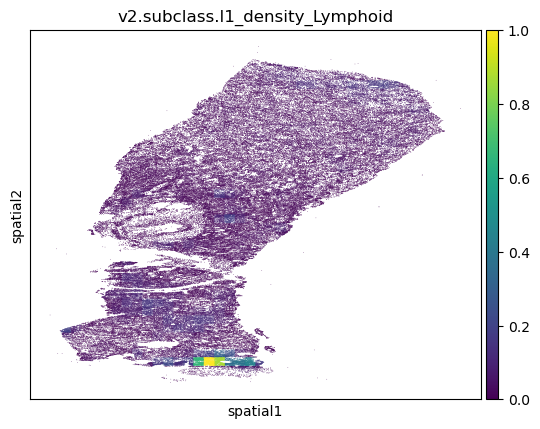

In [18]:
# calculate cell density of specific desired cell type
density_key = mb.calc.cell_density(
    adata,
    groupby="v2.subclass.l1",  
    groups=["Lymphoid"],  
    resolution=4  
)

# plot cell density
mb.plot.cell_density(
    adata,
    key=density_key
)

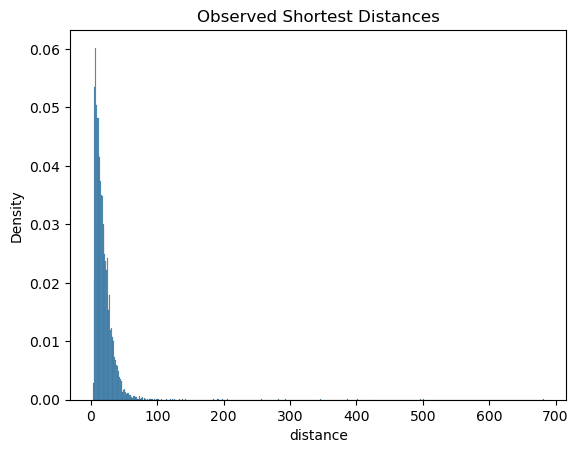

In [19]:
# calculate shortest distances between specific cells of interest

distances = mb.calc.shortest_distances(
    adata,
    groupby = "v2.subclass.l1",
    group1 = "Lymphoid",
    group2 = ["Myeloid"]
)
mb.plot.shortest_distances(distances)

In [20]:
# obtain list of shortest distances between cells for a specific cell type

# list of all cell types in your cell type column (here it's v2.subclass.l2)
cell_types = adata.obs['v2.subclass.l2'].unique()

# store the average shortest distance for each cell type
closest_distances = {}

for cell_type in cell_types:
    if cell_type == 'MYOF':  # skip calculating distance to itself
        continue
    
    # calculate shortest distances from `frPT` to the current cell type
    distances = mb.stat.shortest_distances(
        adata,
        groupby='v2.subclass.l2',  # column with cell type annotations
        group1='MYOF',  # source cell type
        group2=[cell_type],  # target cell type
        threshold=100  # set an appropriate threshold (can be adjusted)
    )
    
    # calculate the average shortest distance
    avg_distance = distances.mean()
    closest_distances[cell_type] = avg_distance

# convert the results into a DataFrame for easier viewing
distance_df = pd.DataFrame(list(closest_distances.items()), columns=['Cell Type', 'Average Distance'])
distance_df = distance_df.sort_values(by='Average Distance')

# display the closest cell type
print("Closest cell type to MYOF:")
print(distance_df.head(10))

Closest cell type to MYOF:
   Cell Type  Average Distance
45       FIB         26.398536
12         T         29.156857
57     M-FIB         29.699234
23    resMAC         32.728042
5      PT-S1         36.982631
38   C/M-TAL         38.914253
3        aPT         41.502184
48    VSMC/P         41.859737
4        dPT         44.596539
74    EC-DVR         44.673609


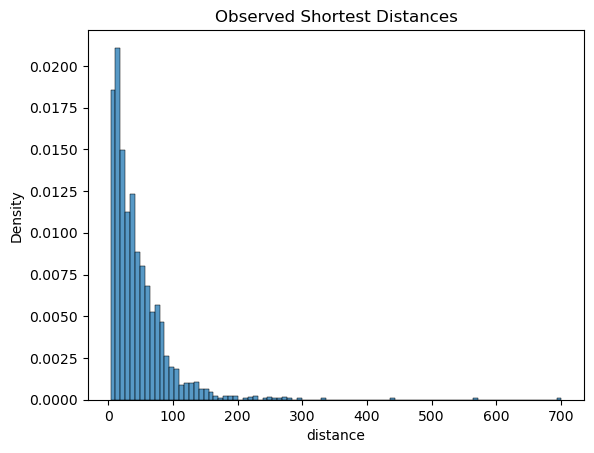

In [22]:
# calculate shortest distances for another pair of cell types

distances = mb.calc.shortest_distances(
    adata,
    groupby = "v2.subclass.l2",
    group1 = "POD",
    group2 = ["FIB"]
)
mb.plot.shortest_distances(distances)

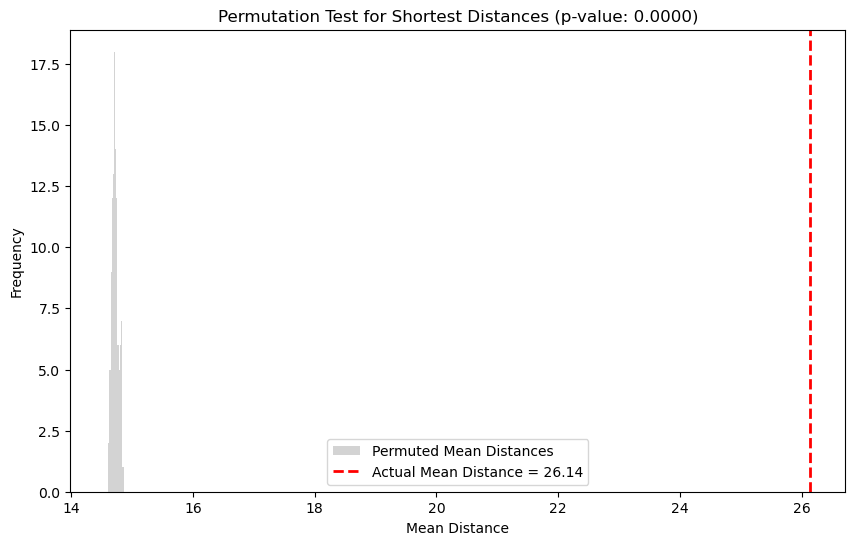

In [25]:
# permutation testing for two cell types (FIB and Lymphoid)

actual_distances = np.array(distances)  
n_permutations = 200  
permuted_means = []

for _ in range(n_permutations):
    permuted_labels = random.sample(list(adata.obs['v2.subclass.l1']), len(adata.obs['v2.subclass.l1']))
    adata.obs['permuted_label'] = permuted_labels


    permuted_distances = mb.stat.shortest_distances(
        adata,
        groupby='permuted_label',
        group1='Lymphoid',
        group2=['FIB'],
        threshold=60  
    )

    permuted_means.append(np.mean(permuted_distances))

actual_mean = actual_distances.mean()
p_value = np.mean([actual_mean <= permuted_mean for permuted_mean in permuted_means])

plt.figure(figsize=(10, 6))
plt.hist(permuted_means, bins=30, color='lightgrey', label='Permuted Mean Distances')
plt.axvline(actual_mean, color='red', linestyle='dashed', linewidth=2, label=f'Actual Mean Distance = {actual_mean:.2f}')
plt.xlabel('Mean Distance')
plt.ylabel('Frequency')
plt.title(f'Permutation Test for Shortest Distances (p-value: {p_value:.4f})')
plt.legend()
plt.show()

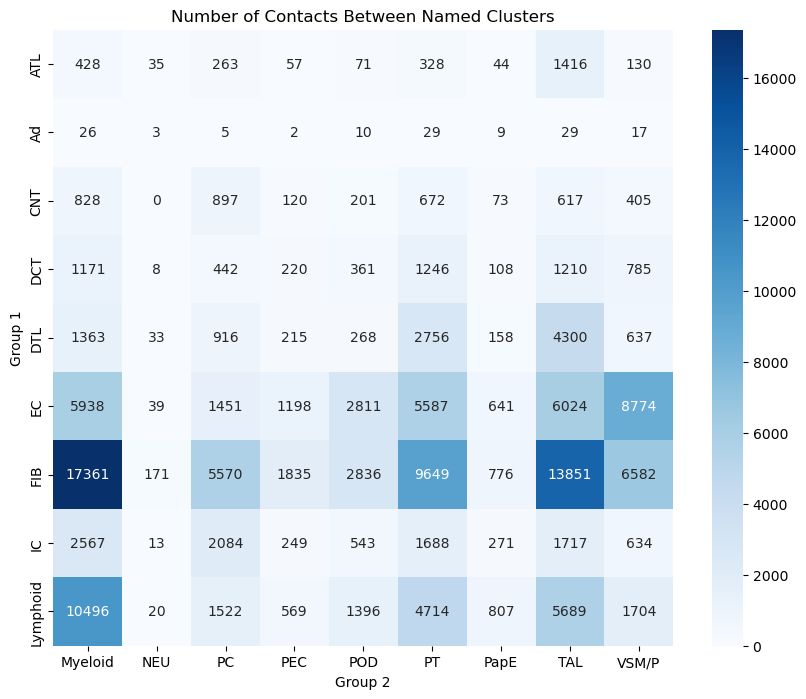

In [28]:
# define clusters to analyze (replace with your specific clusters)
group1=['ATL', 'Ad', 'CNT', 'DCT', 'DTL', 'EC', 'FIB', 'IC', 'Lymphoid'] 
group2=['Myeloid', 'NEU', 'PC', 'PEC', 'POD', 'PT', 'PapE', 'TAL', 'VSM/P']

# calculate cell neighbors using cell_neighbors instead of cell_contact
observed_contacts = mb.calc.cell_neighbors(
    adata,
    groupby='v2.subclass.l1',  # Use your cluster column name
    group1=group1,
    group2=group2,
    radius=15  # use your desired radius
)

# initialize a DataFrame to count contacts between clusters
group_contact_counts = pd.DataFrame(0, index=group1, columns=group2)

# create a mapping from cell barcodes to clusters
cell_to_cluster = adata.obs['v2.subclass.l1'].to_dict()

# count interactions between clusters
for cell, neighbors in observed_contacts.items():
    # Skip if the cell does not have a corresponding cluster
    if cell not in cell_to_cluster:
        continue

    # get the cluster of the current cell (group 1)
    cell_cluster = cell_to_cluster[cell]

    # only consider cells that belong to group1
    if cell_cluster not in group1:
        continue

    # iterate over neighbors of this cell
    for neighbor in neighbors:
        # Skip if the neighbor does not have a corresponding cluster
        if neighbor not in cell_to_cluster:
            continue

        # get the cluster of the neighbor cell (group 2)
        neighbor_cluster = cell_to_cluster[neighbor]

        # only count if the neighbor's cluster is in group2
        if neighbor_cluster in group2:
            group_contact_counts.loc[cell_cluster, neighbor_cluster] += 1

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(group_contact_counts, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax)
plt.title('Number of Contacts Between Named Clusters')
plt.xlabel('Group 2')
plt.ylabel('Group 1')
plt.show()

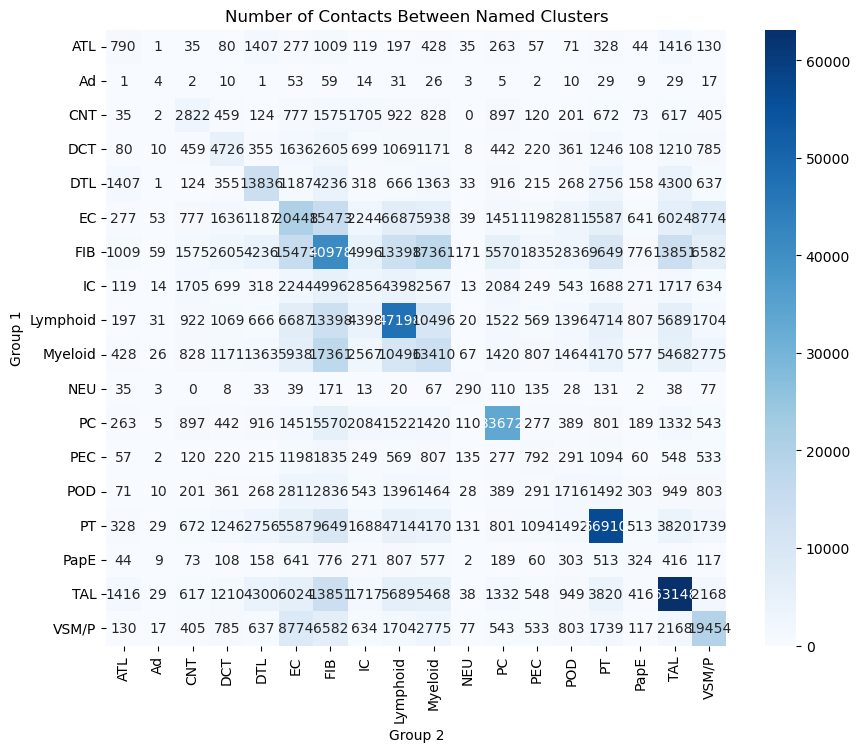

In [29]:
# define clusters to analyze (using all clusters)
group1=['ATL', 'Ad', 'CNT', 'DCT', 'DTL', 'EC', 'FIB', 'IC', 'Lymphoid', 'Myeloid', 'NEU', 'PC', 'PEC', 'POD', 'PT', 'PapE', 'TAL', 'VSM/P'] 
group2=['ATL', 'Ad', 'CNT', 'DCT', 'DTL', 'EC', 'FIB', 'IC', 'Lymphoid', 'Myeloid', 'NEU', 'PC', 'PEC', 'POD', 'PT', 'PapE', 'TAL', 'VSM/P']

# calculate cell neighbors 
observed_contacts = mb.calc.cell_neighbors(
    adata,
    groupby='v2.subclass.l1',
    group1=group1,
    group2=group2,
    radius=15  
)

# initialize a DataFrame to count contacts between clusters
group_contact_counts = pd.DataFrame(0, index=group1, columns=group2)

# create a mapping from cell barcodes to clusters
cell_to_cluster = adata.obs['v2.subclass.l1'].to_dict()

# count interactions between clusters
for cell, neighbors in observed_contacts.items():
    # Skip if the cell does not have a corresponding cluster
    if cell not in cell_to_cluster:
        continue

    # get the cluster of the current cell (group 1)
    cell_cluster = cell_to_cluster[cell]

    # only consider cells that belong to group1
    if cell_cluster not in group1:
        continue

    # iterate over neighbors of this cell
    for neighbor in neighbors:
        # Skip if the neighbor does not have a corresponding cluster
        if neighbor not in cell_to_cluster:
            continue

        # get the cluster of the neighbor cell (group 2)
        neighbor_cluster = cell_to_cluster[neighbor]

        # only count if the neighbor's cluster is in group2
        if neighbor_cluster in group2:
            group_contact_counts.loc[cell_cluster, neighbor_cluster] += 1

fig, ax = plt.subplots(figsize=(10, 8))
sns.heatmap(group_contact_counts, annot=True, fmt="d", cmap="Blues", cbar=True, ax=ax)
plt.title('Number of Contacts Between Named Clusters')
plt.xlabel('Group 2')
plt.ylabel('Group 1')
plt.show()